In [1]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

# Cell fate prediction in hematopoietic stem cells

    Prospective identification of hematopoietic lineage choice by deep learning
    Felix Buggenthin*, Florian Buettner*, Philipp S Hoppe, Max Endele, Manuel Kroiss, Michael Strasser, Michael Schwarzfischer, Dirk Loeffler, Konstantinos D Kokkaliaris, Oliver Hilsenbeck, Timm Schroeder†, Fabian J Theis†, Carsten Marr†
    Nature Methods 14, 403–406 (2017)


[Paper](http://www.nature.com/nmeth/journal/v14/n4/full/nmeth.4182.html), [Code](https://github.com/QSCD/HematoFatePrediction) 

## Quick recap:
- murine blood stem cells differentiate into distinct cell types
<!--![Orkin1](orkin1.png)-->
![Orkin2](orkin2.png)

- continous in vitro imaging of this process over several days
- can we use cell morphology to predict in advance what kind of type a cell will differentiate into

# Raw data
- brightfield images
- cell tracking

<img src="movie_positions.png" alt="Position layout" style="width: 400px;"/>


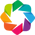

Loading BokehJS ...

In [42]:
import holoviews as hv
hv.extension('bokeh')
import bokeh
from bokeh.io import output_notebook, show
import bokeh.plotting as bp # figure, show, output_file
output_notebook()

In [3]:
# lets look at a couple of frames

In [7]:
tt = range(3430,3450)
img_list = [m.loadimage(position=54, timepoint=i, WL='w00', extension='png', normalizer=imageNormalizer.NoNormalizer())[:600:2,:600:2]
        for i in tt]

In [8]:
plot_image_bokeh(m.loadimage(position=54, timepoint=3430, WL='w00', extension='png', normalizer=imageNormalizer.NoNormalizer()))

In [9]:
%%output size=150
%%opts Image style(cmap='Greys_r')
hv_plot_stack(img_list, tt)

/home/michi/anaconda3/envs/py36_keras/lib/python3.6/site-packages/bokeh/core/json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


:HoloMap   [Time]
   :Image   [x,y]   (z)

# Handling the data
a convenient wrapper around the time-lapse data:

    git clone https://github.com/redst4r/movieTools.git

In [6]:
import config
import imageNormalizer
from movie import Movie
config.TTTDIR = '/home/michi/pythonProjects/deepLearning/Hemato_korea/data/'

In [7]:
m = Movie('experiment3', verbose=False)  # 140206
m.get_all_positions()
len(m.get_all_images())

1534

In [48]:
# lets look at a single image
# I = m.loadimage(position=54, timepoint=2690, WL='w00', extension='png', normalizer=movie.NoNormalizer())
I = m.loadimage(position=54, timepoint=3450, WL='w00', extension='png', normalizer=imageNormalizer.NoNormalizer())

# plt.figure(figsize=(20,20))
# plt.imshow(I, cmap=plt.cm.Greys_r);

plot_image_bokeh(I)

**Observations**
- uneven illumination
- borders of the cover-slip
- dirt

In [64]:
average_intensity_over_time = []
mean_image = np.zeros(I.shape)
for (pos, time, wl), fname in m.get_all_images().items():
    if pos==55:
        I = m.loadimage(position=55, timepoint=time, WL='w00', extension='png', normalizer=imageNormalizer.NoNormalizer())
        avg = I.mean()
        average_intensity_over_time.append((time,avg))
        mean_image += I
mean_image = mean_image/len(average_intensity_over_time)

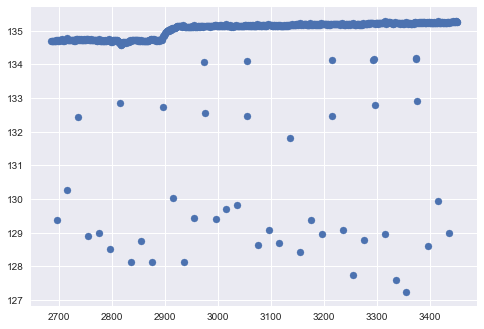

In [65]:
a,b = zip(*average_intensity_over_time)
plt.figure()
plt.scatter(a,b);
plt.show()

# Background normalization
**Methods**

1. subtracing the time averaged image (get rid of static dirt)
2. subtract space averaged mean for each image (get rid of changing intensities)
3. more sophisticated: [BaSiC](https://github.com/QSCD/BaSiC). Takes care of all at once
        A BaSiC Tool for Background and Shading Correction of Optical Microscopy Images
        Tingying Peng, Kurt Thorn, Timm Schroeder, Lichao Wang, Fabian J Theis, Carsten Marr, Nassir Navab
        Nature Communication 8:14836 (2017)

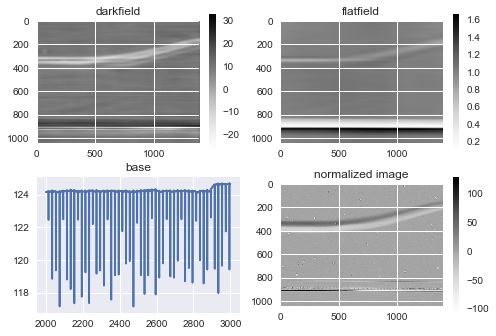

In [67]:
plt.figure(figsize=(20,20))
SLIC.plot_background('/home/michi/pythonProjects/deepLearning/Hemato_korea/data//experiment3/experiment3_p0054/experiment3_p0054_t03000_z001_w00.png')

In [60]:
I, I_fb, I_slic = [m.loadimage(position=54, timepoint=3450, WL='w00', extension='png', normalizer= _) \
                   for _ in [imageNormalizer.NoNormalizer(), imageNormalizer.Felix_Normalizer(), imageNormalizer.SLIC_Normalizer()]]


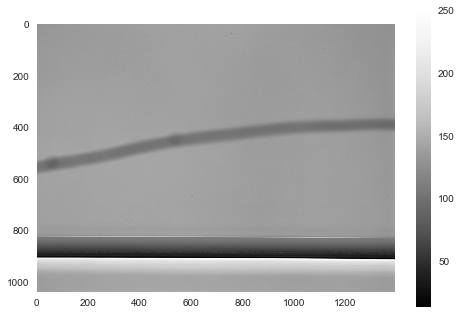

In [91]:
plot_image_mpl(mean_image); plt.grid(); plt.show()
# plot_image_bokeh(mean_image[::5,::5])

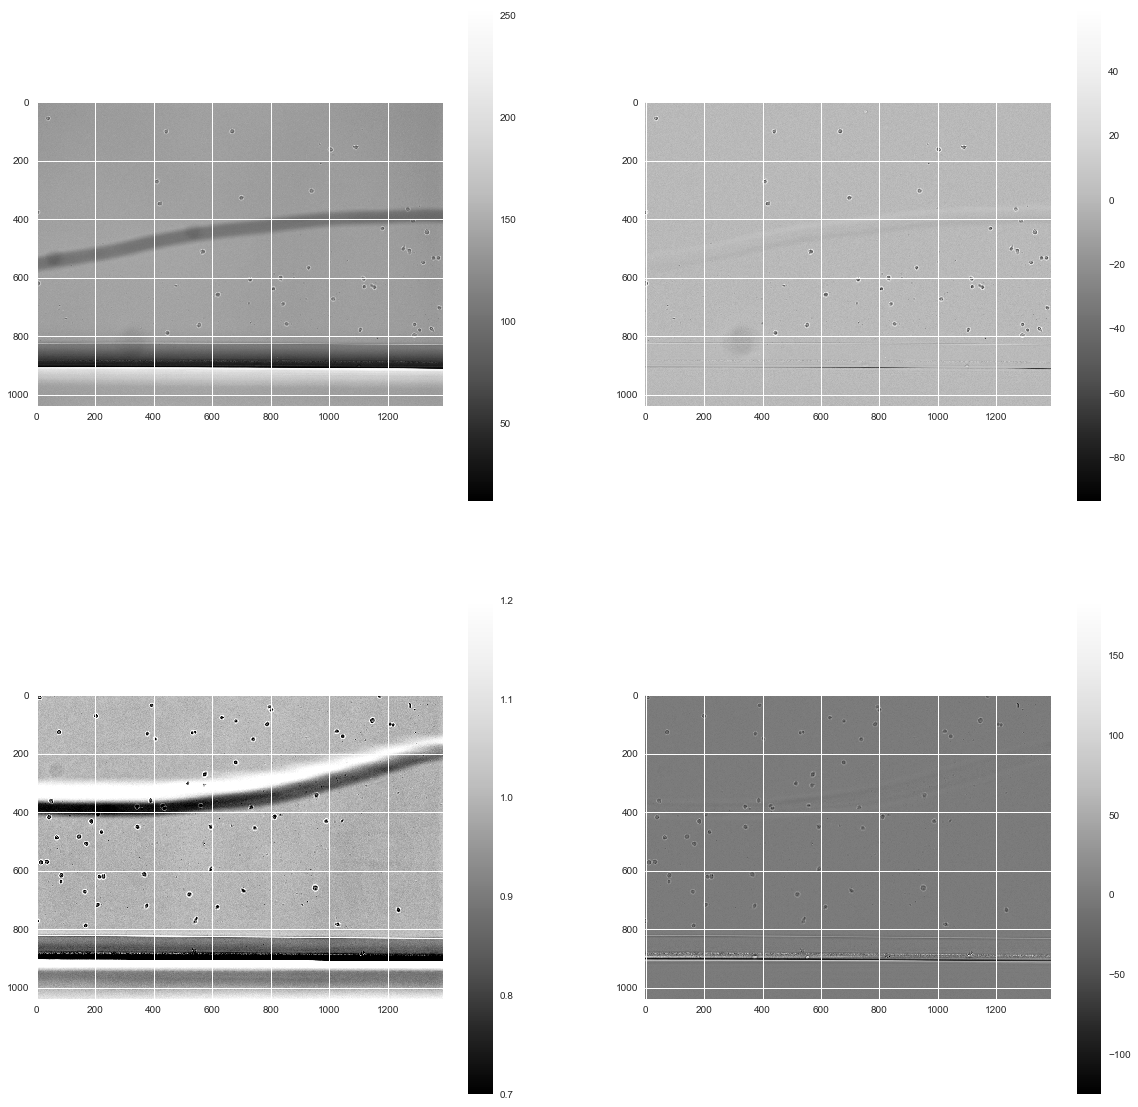

In [92]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plot_image_mpl(I)
plt.subplot(222)
plot_image_mpl(I-mean_image)

plt.subplot(223)
plot_image_mpl(I_fb)

plt.subplot(224)
plot_image_mpl(I_slic)
plt.show()